# CSV_3

In [ ]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
music_df = pd.read_csv("features_3_sec.csv" ,na_values=["NaN", " "])
print(music_df.shape)
display(music_df)


(7560, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,1.675416e+05,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,9.052569e+04,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,1.114074e+05,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,1.119523e+05,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,7.966727e+04,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,pop.00056.3.wav,66149,0.594033,0.069081,0.327071,0.006457,2923.309849,1.033094e+06,3094.023841,251841.511538,...,47.218281,4.112070,43.086983,4.384980,58.017548,1.588319,74.266830,1.697764,86.024467,pop
7556,pop.00056.4.wav,66149,0.449598,0.100177,0.217713,0.011561,3968.289576,1.408157e+06,3350.615212,139134.698680,...,65.899788,1.136740,82.992523,0.810197,110.001518,0.556189,52.911583,-4.549397,71.980118,pop
7557,pop.00056.5.wav,66149,0.470441,0.091351,0.202341,0.016248,4224.694005,2.227874e+06,3320.778185,171748.374473,...,109.034821,5.870121,88.683838,2.938603,67.753853,0.930041,34.908157,-3.620315,56.020145,pop
7558,pop.00056.6.wav,66149,0.455900,0.102460,0.225029,0.014847,3880.286375,2.447756e+06,3225.635049,180548.520348,...,115.156464,3.799995,102.699081,0.957486,60.833096,-0.088938,66.452415,-4.871234,72.593750,pop


In [ ]:
# Remove rows with missing values
music_df.dropna(axis=0, inplace=True)

# Check for missing values
missing_values = music_df.isnull().sum()

# Print columns with missing values and their respective counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

print(music_df.shape)

Columns with Missing Values:
Series([], dtype: int64)
(7559, 60)


In [ ]:
# Extract features (X) and labels (y)
x = music_df.drop(['label'], axis=1)  # Assuming 'label' is the column containing class labels
X = x.iloc[:, 1:]
y = music_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the DataFrames
print("X_train_scaled DataFrame:")
display(X_train_scaled_df)

print("\nX_test_scaled DataFrame:")
display(X_test_scaled_df)


X_train_scaled DataFrame:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.469625,0.644937,0.441954,0.229709,0.423606,0.095587,0.618942,0.083949,0.536009,...,0.436051,0.037629,0.234469,0.101707,0.401046,0.047337,0.456237,0.047431,0.494714,0.058763
1,0.0,0.306516,0.608431,0.244057,0.065390,0.096138,0.017020,0.193164,0.026222,0.118979,...,0.425579,0.067442,0.496849,0.059855,0.372081,0.123393,0.453117,0.037613,0.443404,0.055609
2,0.0,0.388983,0.604276,0.247331,0.037531,0.084860,0.014196,0.220710,0.016529,0.092627,...,0.344766,0.049006,0.410745,0.043362,0.285599,0.082475,0.453499,0.029635,0.512719,0.019479
3,0.0,0.559110,0.494003,0.282206,0.065363,0.541680,0.083143,0.679671,0.050258,0.635741,...,0.546325,0.032738,0.354017,0.069611,0.519819,0.076412,0.326303,0.021197,0.574921,0.034968
4,0.0,0.523820,0.499142,0.321492,0.026373,0.447763,0.023503,0.626996,0.042957,0.473333,...,0.209689,0.055662,0.263432,0.069345,0.329053,0.077545,0.368433,0.051917,0.458413,0.073450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,0.0,0.244643,0.512127,0.106660,0.003336,0.205486,0.011046,0.424186,0.031643,0.263061,...,0.515206,0.062300,0.385465,0.023487,0.387703,0.020829,0.491369,0.024332,0.729122,0.146864
6043,0.0,0.202595,0.570511,0.293618,0.030169,0.266651,0.063152,0.437779,0.083951,0.322118,...,0.339125,0.068569,0.341529,0.058697,0.351287,0.045532,0.292000,0.035256,0.396335,0.081254
6044,0.0,0.230362,0.661201,0.219122,0.070445,0.163259,0.022333,0.276992,0.018786,0.201833,...,0.361798,0.109299,0.492097,0.077233,0.381883,0.082383,0.494171,0.040240,0.539568,0.103781
6045,0.0,0.447922,0.642853,0.283875,0.070321,0.231972,0.264402,0.399625,0.225179,0.252404,...,0.520349,0.102507,0.315600,0.249358,0.363916,0.061379,0.388265,0.055619,0.485205,0.029135



X_test_scaled DataFrame:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.658333,0.411822,0.549910,0.075905,0.415607,0.180037,0.700829,0.387789,0.537381,...,0.404789,0.052636,0.499504,0.042081,0.382335,0.027210,0.549541,0.020835,0.493111,0.026683
1,0.0,0.121402,0.492501,0.078435,0.010976,0.064527,0.000984,0.235506,0.065443,0.024162,...,0.339062,0.159061,0.371784,0.074339,0.236292,0.038108,0.299923,0.032923,0.346078,0.040516
2,0.0,0.523551,0.675103,0.512155,0.187348,0.539120,0.114594,0.617807,0.094044,0.554598,...,0.500215,0.257376,0.503860,0.210421,0.454044,0.256824,0.392622,0.126172,0.496940,0.172742
3,0.0,0.492843,0.539681,0.483390,0.083389,0.622342,0.087298,0.692927,0.102477,0.644772,...,0.451552,0.085516,0.472280,0.250694,0.462272,0.162676,0.444055,0.050484,0.468898,0.093729
4,0.0,0.522627,0.468626,0.373800,0.018827,0.467690,0.066007,0.594252,0.129155,0.508623,...,0.416983,0.084992,0.382611,0.045069,0.314502,0.053834,0.395884,0.037599,0.488463,0.076632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,0.0,0.507976,0.458911,0.260699,0.008483,0.453357,0.014992,0.484508,0.025479,0.439754,...,0.550655,0.051998,0.256159,0.049496,0.347447,0.029463,0.209381,0.021929,0.479131,0.034876
1508,0.0,0.680266,0.447857,0.187729,0.012757,0.727080,0.124587,0.866910,0.026034,0.808712,...,0.385480,0.026768,0.421890,0.038161,0.396256,0.033699,0.421411,0.024626,0.445460,0.032111
1509,0.0,0.513314,0.435593,0.518000,0.093726,0.547598,0.045435,0.755560,0.064455,0.649622,...,0.365668,0.028213,0.456369,0.073078,0.355556,0.055845,0.553082,0.032019,0.448388,0.048659
1510,0.0,0.658657,0.456304,0.206073,0.074997,0.511602,0.071694,0.601578,0.044171,0.576448,...,0.484116,0.039476,0.349470,0.054534,0.475822,0.037003,0.438803,0.033916,0.548664,0.026037


In [ ]:
n_components = 40   # Set the desired number of components
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)


# Train a machine learning model (e.g., RandomForest) using the PCA-transformed features
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test set
predictions = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8882275132275133


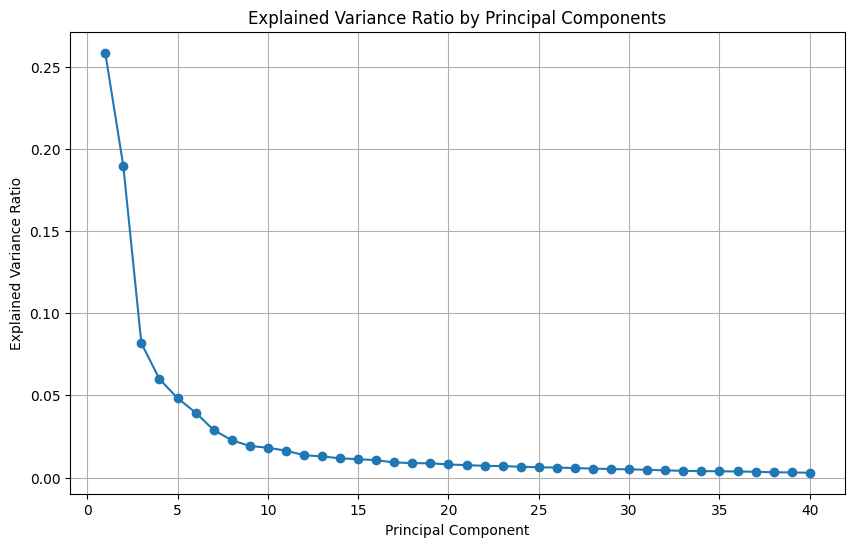

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explained Variance Ratio for PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()
